In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numba import njit

In [2]:
njit = lambda f: f

In [2]:
@njit
def st(x, u):
    return np.sign(x) * np.maximum(np.abs(x) - u, 0.)

In [69]:
@njit
def f(D, x, lbda, L, p):
    z = D.T.dot(x)
    mask = (np.abs(z) > lbda) * 1.
    M = np.diag(mask)
    G = np.eye(p) - D.T.dot(D) / L
    G = np.dot(M, np.dot(G, M))
    return np.dot(G, z - lbda * np.sign(z))

In [164]:
p_list = []
u_list = []
lbda = 0.5
p = 3
k = 2
#_, _, D = np.linalg.svd(np.random.randn(k, p), full_matrices=False)
D = np.random.randn(k, p)
L = np.linalg.norm(D, ord=2) ** 2

@njit
def run_expe(D, n_expe=1000, n_trials=10000, normalize=True, p=3, k=3, tol=1e-5):
    conjecture = True
    i_list = np.zeros(n_expe)
    for expe in range(n_expe):
        eps = np.random.randn(p, k)
        is_neg = False
        is_pos = False
        u_min = 1000
        u_max = -1000
        # print('\r %d' % expe, flush=True, end='')
        u_list = np.zeros(n_trials)
        for i in range(n_trials):
            x = np.random.randn(k, )
            if normalize:
                x /= np.max(np.abs(D.T.dot(x)))
            P = f(D, x, lbda, L, p)
            u = np.dot(eps, x).dot(P)
            u_list[i] = u
            if u > -tol:
                is_pos = True
            if u < tol:
                is_neg = True
            if is_pos and is_neg:
                i_list[expe] = i
                break 
        else:
            conjecture = False
            print(expe, 'fail')
            break
    return conjecture, i_list, u_list

776 fail
False


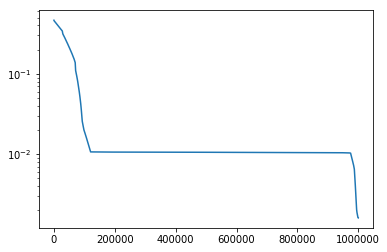

In [165]:
conj, i_list, u_list = run_expe(D, n_expe=100000, n_trials=1000000, normalize=True, p=p, k=k)
print(conj)
plt.semilogy(np.abs(np.sort(u_list)))

In [166]:
u_list

array([-0.01058982, -0.01052302, -0.0105461 , ..., -0.01055063,
       -0.01061307, -0.01054864])

In [163]:
u_list

array([0.24238297, 0.19668471, 0.54868404, ..., 0.        , 0.        ,
       0.        ])

In [109]:
i_list.max()

4186.0